In [1]:
import numpy as np
import pandas as pd

import linmix

import matplotlib.pyplot as plt
%matplotlib inline

from Zoldak.Math.tools import to_log

In [2]:
data = pd.read_csv(('/Users/kimzoldak/Github/GRB_Hubble_Diagram/data/'
                    'Band_13_GBM+LAT__22_GBMconstrained.txt'), 
                   sep='\t')

data = data[data.trigger.map(lambda x: x != 'bn090510016')]  # remove short burst
data.index = range(0, len(data))

df = pd.DataFrame()
df['eiso'] = data['eiso']/1E52
df['eiso_err'] = data.loc[:, ['eiso_err_low', 'eiso_err_up']].apply(np.mean, 1)
df['eiso_err'] = df['eiso_err']/1E52
df['epeakRest'] = data['epeakRest']
df['epeakRest_err'] = data.loc[:, ['epeakRest_err_low', 'epeakRest_err_up']].apply(np.mean, 1)


y, ysig = to_log(df['eiso'], df['eiso_err'], which='average', errTypeReturn='moe')
x, xsig = to_log(df['epeakRest'], df['epeakRest_err'], which='average', errTypeReturn='moe')

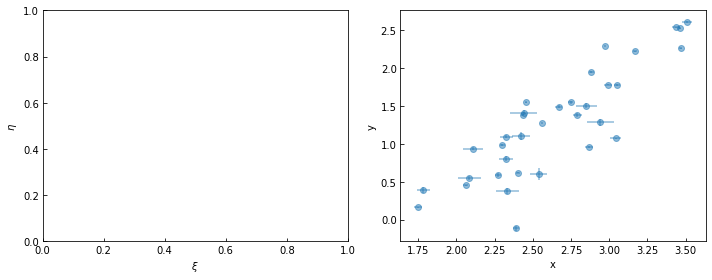

In [3]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\eta$')
# ax.set_xlim(-6,6)
# ax.set_ylim(-3,4)
ax = fig.add_subplot(122)
ax.scatter(x, y, alpha=0.5)
ax.errorbar(x, y, xerr=xsig, yerr=ysig, ls=' ', alpha=0.5)
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
# ax.set_xlim(-10,10)
# ax.set_ylim(-5,6)
# ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
fig.tight_layout()
plt.show()

In [5]:
lm = linmix.LinMix(x=x, y=y, xsig=xsig, ysig=ysig, K=2)
lm.run_mcmc(silent=False)


Iteration:  100
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[1.00427187 1.00448632 1.01283315 0.99580446 0.99481692 1.01134419]

Iteration:  200
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99898627 0.99860544 1.00365438 1.01175819 1.01063239 1.00055774]

Iteration:  300
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99949304 0.9992746  1.00841865 1.00897869 1.00609774 1.00076345]

Iteration:  400
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99925208 0.99889426 1.00591652 1.00819289 1.0031626  1.00527322]

Iteration:  500
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99901857 0.99911456 1.00291639 1.00520921 0.99997651 1.00410555]

Iteration:  600
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99882717 0.9989072  1


Iteration:  4800
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99985659 0.99985609 0.99997379 1.00050735 0.99989397 0.99993043]

Iteration:  4900
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99985861 0.99986165 0.99994478 1.00061747 0.99989616 0.99993557]

Iteration:  5000
Rhat values for alpha, beta, log(sigma^2), mean(xi), log(var(xi)), atanh(corr(xi, eta)):
[0.99984892 0.9998651  0.99992292 1.00057463 0.99989822 0.99992163]


In [6]:
cols = ['alpha', 'beta', 'sigsqr', 'pi', 'mu', 'tausqr', 'mu0', 'usqr', 'wsqr', 'ximean', 'xisig', 'corr']

In [7]:
[np.percentile(lm.chain[:][col], [50., 16., 84.]) for col in ['alpha', 'beta', 'sigsqr']]

[array([-2.2513622 , -2.64920202, -1.84879142]),
 array([1.33640398, 1.18658948, 1.48400625]),
 array([0.14985682, 0.11598079, 0.19687971])]

In [8]:
[np.percentile((lm.chain[:][col]**0.5 if 'sig' in col else lm.chain[:][col]), [50., 16., 84.]) for col in ['alpha', 'beta', 'sigsqr']]

[array([-2.2513622 , -2.64920202, -1.84879142]),
 array([1.33640398, 1.18658948, 1.48400625]),
 array([0.38711344, 0.34055953, 0.44371129])]

In [9]:
for col in cols:
    print('%10s: %10.4f'%(col, lm.chain[:][col].mean()))

     alpha:    -2.2505
      beta:     1.3357
    sigsqr:     0.1570
        pi:     0.5000
        mu:     2.6372
    tausqr:     6.8812
       mu0:     2.6367
      usqr:     0.1357
      wsqr:     0.2497
    ximean:     2.6390
     xisig:     0.5253
      corr:     0.8527


In [10]:
for col in cols:
    print('%10s: %10.7f'%(col, np.median(lm.chain[:][col])))

     alpha: -2.2513622
      beta:  1.3364040
    sigsqr:  0.1498568
        pi:  0.5000000
        mu:  2.6329313
    tausqr:  0.2020617
       mu0:  2.6337840
      usqr:  0.1196384
      wsqr:  0.1830867
    ximean:  2.6392634
     xisig:  0.4860680
      corr:  0.8596799


In [12]:
alpha = np.percentile(lm.chain[:]['alpha'], 50.)
beta = np.percentile(lm.chain[:]['beta'], 50.)
sigsqr = np.percentile(lm.chain[:]['sigsqr'], 50.)
sig = sigsqr**0.5

<Figure size 432x288 with 0 Axes>

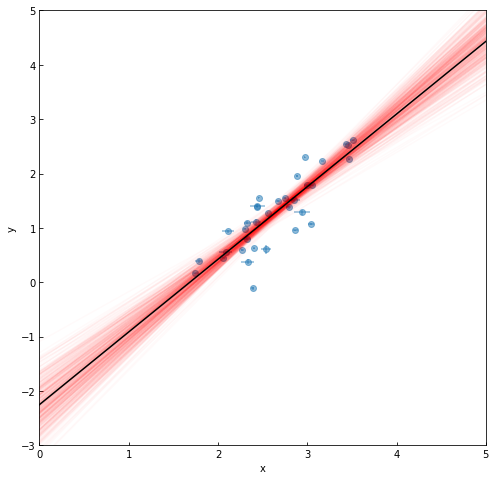

In [13]:
plt.clf()
plt.figure(figsize=(8,8))
plt.scatter(x, y, alpha=0.5)
plt.errorbar(x, y, xerr=xsig, yerr=ysig, ls=' ', alpha=0.5)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(-10,11)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02)
ys = alpha + xs * beta
plt.plot(xs, ys, color='k')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.ylim(-3,5)
plt.xlim(0,5)
plt.show()
# ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
#fig.tight_layout()

In [14]:
print(alpha, beta, sig)

-2.2513622029592 1.3364039784613113 0.38711344216750687
